<a href="https://colab.research.google.com/github/mariusss21/airbnb_dublin/blob/main/Analisando_os_Dados_do_Airbnb_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Dublin, Ireland*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Dublin
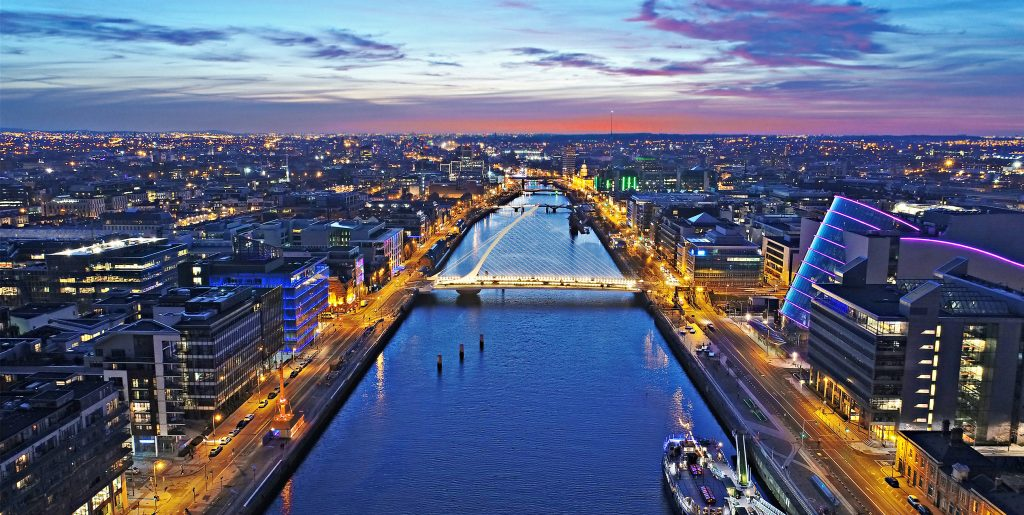 

Dublin é a capital e maior cidade da Irlanda. O nome em inglês deriva da palavra irlandesa "Dubhlinn" (ocasionalmente também grafada Duibhlinn ou Dubh Linn), que significa "Lago Negro". 

Localiza-se na província de Leinster próxima ao ponto mediano da costa leste da Irlanda, sendo cortada pelo Rio Liffey e o centro da região de Dublin.

Dublin é reconhecida como uma cidade global, com um ranking "Alpha-", colocando a cidade entre as 30 mais globalizadas do mundo. Atualmente é o principal centro histórico, cultural, econômico, industrial e educacional da Irlanda.

fonte da imagem: https://morareviajar.net/wp-content/uploads/2018/10/Dublin.jpg

## Turismo em Dublin

Dublin é um forte ponto turístico da Europa. Sua população é bastante educada e hospitaleira, prova disso é a segunda colocação no ranking das melhor recebe turistas na Europa (segundo a revista [Condé Nest Traveller](https://www.cntraveller.com/gallery/friendliest-cities-in-europe)), perdeu para Galway, outra cidade Irlandesa. Podemos perceber um certo padrão aqui :)

Conhecida por seus pubs, fica localizado em Dublin o pub mais velho da Europa com fundação no ano 900.

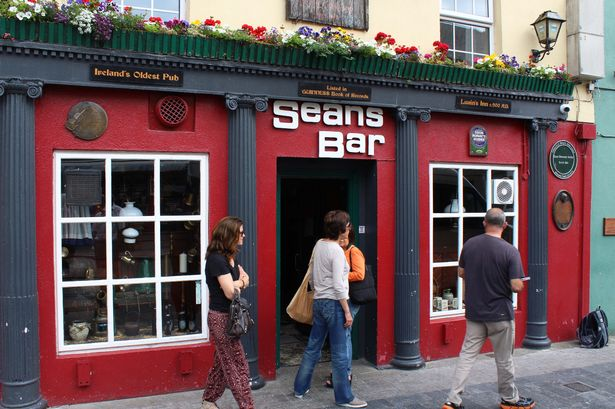

A Irlanda teve em 2018 outro ano recorde para a entrada de visitantes internacionais, com mais de 10,6 milhões de chegadas, um aumento de 6,9% em relação ao ano anterior. 

A relevância turística de Dublin a torna uma cidade ideal para nossa análise.

## Coronavirus e regulamentação Airbnb na Irlanda

O governo irlandês tentou arrefecer o mercado do Airbnb em 2019, e introduziu regulamentos para que os aluguéis de curto prazo em áreas onde houvesse mais necessidade voltassem ao mercado de longo prazo. Entretanto, sem um método eficaz de aplicar essa regulamentação, a tentativa foi em grande parte infrutífera.

Um porta-voz do Airbnb contestou os dados do Inside Airbnb, alegando que a maioria dos anfitriões em todo o mundo planejava alugar suas unidades pelo menos nos níveis pré-pandêmicos quando o coronavírus diminuísse, e acrescentou que o número de **reservas nas grandes cidades europeias havia se recuperado recentemente**.

A empresa disse em um comunicado: "Existem tantas ofertas de casas inteiras no Airbnb na Irlanda hoje quanto havia antes da pandemia. As viagens pelo Airbnb geraram cerca de **800 milhões de euros em atividade econômica para a Irlanda apenas em 2019** e os anfitriões estão muito focados em como podem ajudar sua comunidade local a se reerguer e a impulsionar a recuperação segura do turismo."

[Fonte](https://exame.com/casual/em-dublin-imoveis-trocam-o-airbnb-pelo-mercado-regular-de-aluguel/)

## Etapas do análise

* Importação dos dados

* Observação dos dados (quantidade de linhas e colunas, descrição das colunas)

* Tratamento dos dados ausentes

* Distribuição das variáveis e observação sobre possíveis outliers

* Tratamento dos outliers

* Extração de informações a partir dos dados tratados (preço médio, tipo de anúncios, preço por bairro...)


## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/ireland/leinster/dublin/2021-07-07/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id`: Identificador da imóvel
* `name`: Nome do anúncio (configurado pelo anfitrião)
* `host_id`: Identificador do anfitrião
* `host_name`: Nome do anfitrião
* `neighbourhood_group`: Não há valores para essa variável
* `neighbourhood`: Bairro
* `latitude`: Latitude do imóvel
* `longitude`: Longitude do imóvel
* `room_type`: Tipo do imóvel
* `price`: Preço do aluguel
* `minimum_nights`: Mínimo de noites para a reserva
* `number_of_reviews`: Número de reviews do anúncio
* `last_reviews`: Último review
* `reviews_per_month`: Reviews por mês
* `calculated_host_listings_count`: Número de anúncios do anfitrião
* `availability_365`: Disponibilidade no ano

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,50,3,227,2020-02-08,1.88,3,217
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.29885,-6.31850,Private room,30,1,1,2019-05-11,0.04,1,284
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,63,3,182,2020-02-09,2.26,3,312
3,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,38,2,311,2019-12-21,3.58,3,344
4,162809,5.5 miles south of Dublin City :^),777681,Robbie,NaN,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,65,1,284,2020-02-09,3.90,2,286


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print('Linhas: {}'.format(df.shape[0]))
print('Colunas: {}'.format(df.shape[1]))


Linhas: 7740
Colunas: 16


In [5]:
# tipos de dados do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7740 entries, 0 to 7739
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7740 non-null   int64  
 1   name                            7739 non-null   object 
 2   host_id                         7740 non-null   int64  
 3   host_name                       7408 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7740 non-null   object 
 6   latitude                        7740 non-null   float64
 7   longitude                       7740 non-null   float64
 8   room_type                       7740 non-null   object 
 9   price                           7740 non-null   int64  
 10  minimum_nights                  7740 non-null   int64  
 11  number_of_reviews               7740 non-null   int64  
 12  last_review                     58

#### **Observações**

* Temos a coluna `neighbourhood_group` com todos os valores ausentes
* Além dela, mais 4 colunas possuem valores ausentes (`reviews_per_month`,`last_review`,`host_name` e `name`)
* `last_review` possui datas como seus dados, porém o tipo dela está como 'object'


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# valores ausentes em numero absoluto

df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               7740
reviews_per_month                 1897
last_review                       1897
host_name                          332
name                                 1
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
price                                0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_id                              0
id                                   0
dtype: int64

In [7]:
# valores ausentes em percentual em ordem decrescente

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.245090
last_review                       0.245090
host_name                         0.042894
name                              0.000129
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* As variáveis `reviews_per_month` e `last_review` possuem a mesma quantidade de dados faltantes. Esses dados faltantes estão nas mesmas linhas?

In [8]:
# separando as linhas com valores ausentes na coluna last_review
df_reviews = df.loc[df.last_review.isnull(), ['reviews_per_month', 'last_review', 'number_of_reviews']]
df_reviews.head()

,reviews_per_month,last_review,number_of_reviews
32,NaN,NaN,0
85,NaN,NaN,0
91,NaN,NaN,0
92,NaN,NaN,0
109,NaN,NaN,0


* Pelos primeiras linhas podemos perceber que `last_reviews` e `reviews_per_month` possuem valores nulos e a `number_of_reviews` valor 0
* Vamos confirmar se esse padrão se estende para todas as linhas

In [9]:
# nova contagem dos valores nulos
df_reviews.isnull().sum()

reviews_per_month    1897
last_review          1897
number_of_reviews       0
dtype: int64

In [10]:
# analisando o número de reviews dos anúncios filtrados
df_reviews.number_of_reviews.describe()

count    1897.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: number_of_reviews, dtype: float64

#### **Observações**

* As linhas nulas de `last_review` são as mesmas de `reviews_per_month` e estão relacionadas com o fato dos anúncios possuirem **0 reviews**, ou seja, não há reviews e consequentemente não há uma média mensal de reviews e nem último review

* 100% de valores ausentes para a coluna `neighbourhood_group`, que pode então ser removida 

### **Q3. Qual o tipo de distribuição das variáveis?** 

In [11]:
# removendo a coluna neighbourhood_group
df.drop(columns='neighbourhood_group', inplace=True)

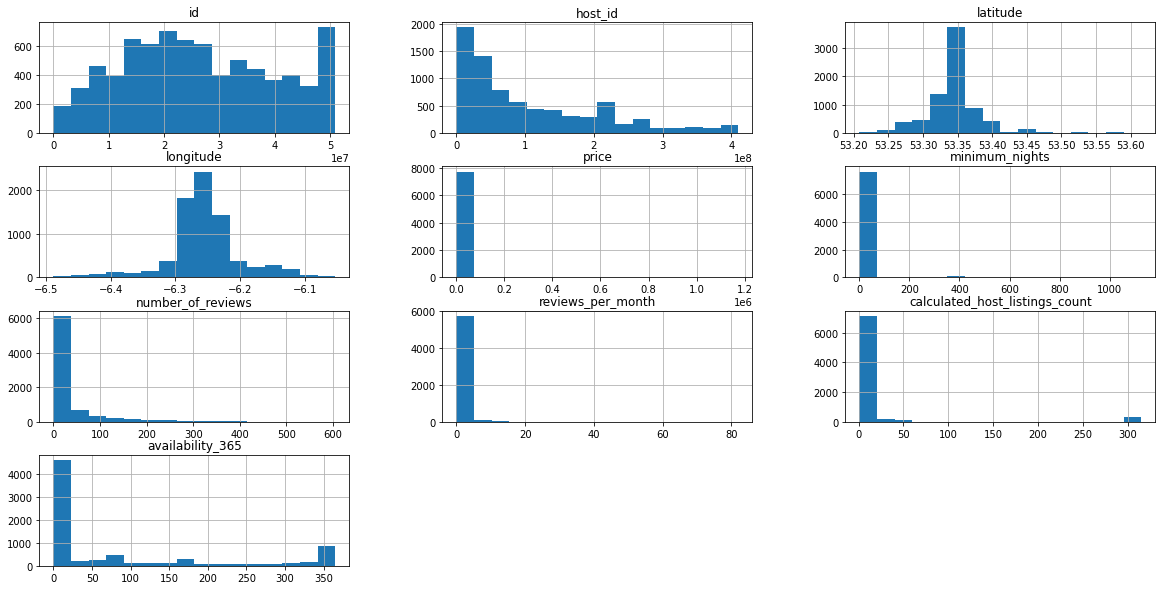

In [12]:
# plotar o histograma das variáveis numéricas
df.hist(bins=16, figsize=(20,10));

In [13]:
# médias de latitude e longitude

print('Latitude média: {}'.format(round(df.latitude.mean(), 2)))
print('Longitude média: {}'.format(round(df.longitude.mean(), 2)))

Latitude média: 53.35
Longitude média: -6.26


#### **Observações**

* As distribuições de latitude e longitude tem um formato semelhante à uma distribuição e valor mérdio coincidem com a localização da Spire, um monumento localizado na O'Connell Street, centro de Dublin. [Localização Spire.](https://www.findlatitudeandlongitude.com/l/The+Spire%2C+Dublin+Northside%2C+Dublin%2C+Ireland/4975483/)

* As demais variáveis estão bem localizadas à esquerda dos gráficos, valendo a pena analisar a possibilidade de outliers


### **Q4. Qual a média dos preços de aluguel?**

In [14]:
# ver a média da coluna `price``
print('Preço médio de aluguel: {} €'.format(round(df.price.mean(), 2)))

Preço médio de aluguel: 270.2 €


In [15]:
# mais detlahes sobre o preço

print('Preço mínimo do aluguel: {} €'.format(round(df.price.min(), 2)))
print('Preço máximo do aluguel: {} €'.format(round(df.price.max(), 2)))
print('Mediana do preço do aluguel: {} €'.format(round(df.price.median(), 2)))

Preço mínimo do aluguel: 0 €
Preço máximo do aluguel: 1173721 €
Mediana do preço do aluguel: 80.0 €


#### **Observações**

* Assim como observado nas distribuições, olhar os dados de preço sugere a presença de outliers

### **Q5. Há outliers no dataset?**

**O que são outliers?**

São valores que se diferenciam drasticamente dos outros valores ou valores que não façam muito sentido para o negócio.

**Exemplos de variáveis que podem conter outliers:**

* `price`: Ao analisarmos o preço mínimo do aluguel vemos que o valor é 0, que não faz muito sentido tendo em vista que as pessoas cobram algum valor para alugar seus imóveis.

* `minimum_nights`: No histogramas vemos que a escala vai até 1000 dias, que no âmbito das possibilidades da plataforma é uma valor coerente (valor máximo possível é 1125 dias), porém 1000 dias é algo perto de 3 anos, o que seria uma prazo bem grande para a proposta do Airbnb


In [16]:
# resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.740000e+03,7740.000000,7740.000000,5843.000000,7740.000000,7740.000000
mean,2.702040e+02,9.177907,28.888760,0.971693,16.375711,84.811757
std,1.334130e+04,43.493065,57.535509,1.757265,61.890639,128.050966
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,5.100000e+01,1.000000,1.000000,0.110000,1.000000,0.000000
50%,8.000000e+01,2.000000,5.000000,0.410000,1.000000,0.000000
75%,1.330000e+02,3.000000,27.000000,1.260000,3.000000,143.000000
max,1.173721e+06,1125.000000,605.000000,82.000000,315.000000,365.000000


#### **Observações**

* `price`: varia entre **0 e 1173721** e possui 75% dos valores abaixo de **133 Euros**

* `minimum_nights`: varia entre **1 e 1125** (máximo da plataforma) e possui 75% dos valores abaixo de **3 dias**

* `reviews_per_month`: Considerando que um mês possui até 31 dias ter uma média de 82 avaliações por mês não seria algo factível. Cabe nos questionar se essa taxa de avaliações é pelo usuário ou pelo anúncio. Considerando o caso do usuário, seria um valor possível considerando que o usuário com mais anúnios possui 315 (`calculated_host_listings_count`possível outlier?)

#### **Analisando o preço do aluguel**


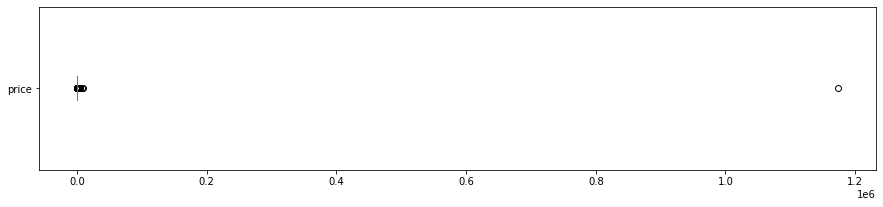

In [17]:
# criando uma cópia do dataframe para limpeza de outliers
df_clean = df.copy()

# boxplot do preço do aluguel
df.price.plot(kind='box', vert=False, figsize=(15, 3))


#### **Observações**

* Nesse primeiro plot não conseguimos sequer visualizar o "box" por do valor máximo ser muito maior que os demais 1.173.721, pelo gráfico o próximo valor fica bem abaixo dos 200.000

In [18]:
# Calculando os limites para outliers da variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  82.0
Limite superior de price:  256.0
Limite inferior de price:  -72.0



Price: valores acima de 256
535 entradas
6.9121%


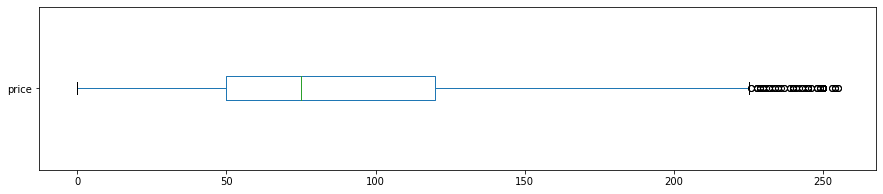

In [19]:
# Serão mantidos apenas os valores abaixo de 256, o limite inferior para o nosso caso não faz sentido já que o valor foi negativo

# ver quantidade de valores acima de 256 para price
print("\nPrice: valores acima de 256")
print("{} entradas".format(len(df[df.price > 256])))
print("{:.4f}%".format((len(df[df.price > 256]) / df.shape[0])*100))

df_clean = df_clean[df.price < 256]
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show();

#### **Analisando `minimum_nights`**

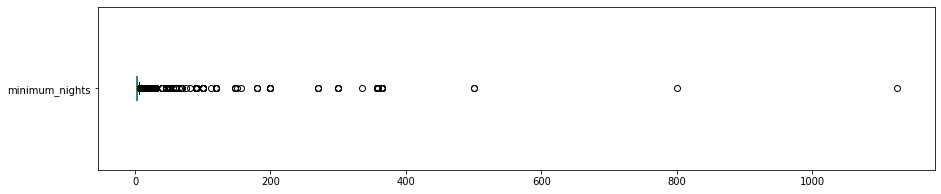

In [20]:
# boxplot do minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3));

#### **Observações**

* Temos alguns valores bem fora da média e assim como na primeira análise do preço nem sequer é possível ver o boxplot

In [21]:
# Calculando os limites para outliers da variável minimum
q1_minimum = df.minimum_nights.quantile(.25)
q3_minimum = df.minimum_nights.quantile(.75)
IQR_minimum = q3_minimum - q1_minimum
print('IQR da variável minimum: ', IQR_minimum)

# definindo os limites                                       
sup_minimum = q3_minimum + 1.5 * IQR_minimum
inf_minimum = q1_minimum - 1.5 * IQR_minimum

print('Limite superior de minimum_nights: ', sup_minimum)
print('Limite inferior de minimum_nights: ', inf_minimum)

IQR da variável minimum:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0



minimum_nights: valores acima de 6
1199 entradas
15.4910%

minimum_nights: valores acima de 10
822 entradas
10.6202%

minimum_nights: valores acima de 15
342 entradas
4.4186%


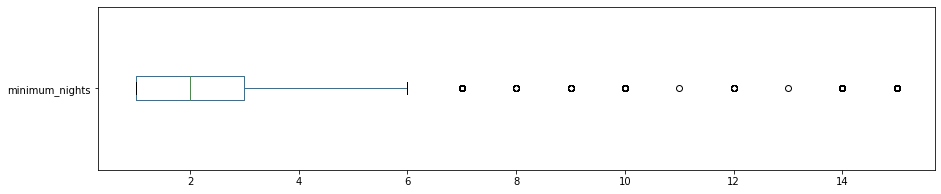

In [22]:
# Serão mantidos apenas os valores abaixo de 7, o limite inferior para o nosso caso não faz sentido já que o valor foi negativo

print("\nminimum_nights: valores acima de 6")
print("{} entradas".format(len(df[df.minimum_nights > 6])))
print("{:.4f}%".format((len(df[df.minimum_nights > 6]) / df.shape[0])*100))

print("\nminimum_nights: valores acima de 10")
print("{} entradas".format(len(df[df.minimum_nights > 10])))
print("{:.4f}%".format((len(df[df.minimum_nights > 10]) / df.shape[0])*100))

print("\nminimum_nights: valores acima de 15")
print("{} entradas".format(len(df[df.minimum_nights > 15])))
print("{:.4f}%".format((len(df[df.minimum_nights > 15]) / df.shape[0])*100))

df_clean = df_clean[df_clean.minimum_nights <= 15]
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#### **Analisando `reviews_per_month`**

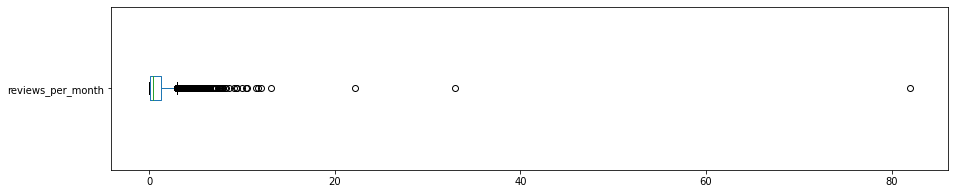

In [23]:
# boxplot do reviews_per_month
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3))

#### **Observações**

* A documentação diz que `reviews_per_month` é:

      "The number of reviews the listing has over the lifetime of the listing"

* A definição é muito similar a de `number_of_reviews`:

      "The number of reviews the listing has"

* As definições deixam claro que se tratam de reviews do anúncio, mas é um pouco confusa quanto ao período, considerando que em tradução livre reviews_per_month seria "Avaliações por mês"


([Dicionário das variáveis](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896)) 

In [24]:
# Calculando os limites para outliers da variável reviews_per_month
q1_reviews_per_month = df.reviews_per_month.quantile(.25)
q3_reviews_per_month = df.reviews_per_month.quantile(.75)
IQR_reviews_per_month = q3_reviews_per_month - q1_reviews_per_month
print('IQR da variável reviews_per_month: ', IQR_reviews_per_month)

# definindo os limites                                       
sup_reviews_per_month = q3_reviews_per_month + 1.5 * IQR_reviews_per_month
inf_reviews_per_month = q1_reviews_per_month - 1.5 * IQR_reviews_per_month

print('Limite superior de reviews_per_month: ', sup_reviews_per_month)
print('Limite inferior de reviews_per_month: ', inf_reviews_per_month)

IQR da variável reviews_per_month:  1.15
Limite superior de reviews_per_month:  2.985
Limite inferior de reviews_per_month:  -1.6149999999999998



reviews_per_month: valores acima de 3
462 entradas
5.9690%


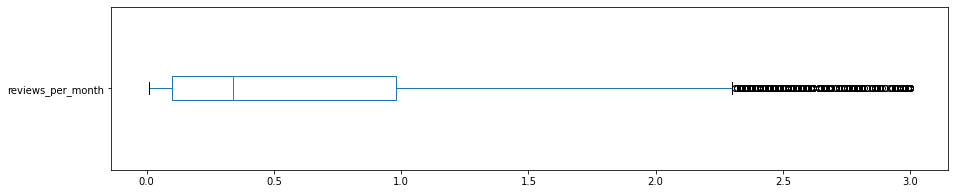

In [25]:
# serão descartados os anúncios com reviews_per_month maior que 10 (considerando o mês com 30 dias e minimum_nights de 1)

print("\nreviews_per_month: valores acima de 3")
print("{} entradas".format(len(df[df.reviews_per_month > 3])))
print("{:.4f}%".format((len(df[df.reviews_per_month > 3]) / df.shape[0])*100))

df_clean = df_clean[df_clean.reviews_per_month <= 3]
df_clean.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#### **Histogramas após limpeza dos dados**

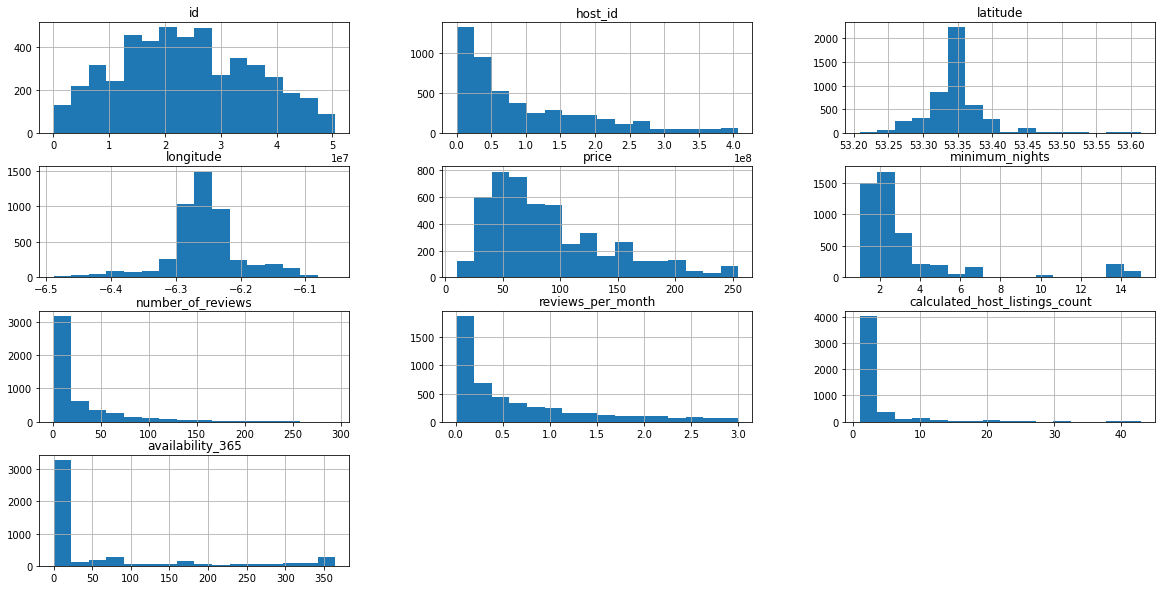

In [26]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=16, figsize=(20,10));

#### **Observações**

* Com a remoção dos valores mais extremos já foi possível observar melhor a distribuição dos dados

* Um valor intrigante foi o `calculated_host_listing_count`, ter mais que 40 anúncios do mesmo usuário me soou como um possível outlier, segue a análise desse caso

In [27]:
# agrupando os anúncios pelo id do host
df_aux = df_clean.groupby(['host_id']).count()

# mostrando os ids com mais de 10 anúncios
print(df_aux.loc[df_aux.calculated_host_listings_count > 10])

           id  name  ...  calculated_host_listings_count  availability_365
host_id              ...                                                  
234243     12    12  ...                              12                12
12036741   12    12  ...                              12                12
31284582   18    18  ...                              18                18
54082092   12    12  ...                              12                12
69683252   13    13  ...                              13                13
99725020   11    11  ...                              11                11
127935371  19    19  ...                              19                19
151128160  13    13  ...                              13                13
160402201  29    29  ...                              29                29
162402361  15    15  ...                              15                15
177826854  11    11  ...                              11                11
372080642  14    14  ... 

In [28]:
# o id 403430235 possui mais de 40 anúncios, vamos conferir

df_clean[df_clean.host_id == 403430235]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1245,11889903,"Modern, City Centre 3 bedroom Apartment",403430235,James,Dublin City,53.34835,-6.27858,Entire home/apt,184,14,102,2021-03-07,2.53,43,360
1298,12285598,Superb Central apartment in D4,403430235,James,Dublin City,53.33749,-6.24009,Entire home/apt,131,7,62,2019-10-09,1.19,43,0
1783,14459442,Bright & Modern 2br Apt in Dublin 1 in period ...,403430235,James,Dublin City,53.35306,-6.24804,Entire home/apt,103,15,153,2019-10-29,2.62,43,1
2216,17383524,Central Dublin Flat in a Great Location!,403430235,James,Dublin City,53.34767,-6.26599,Entire home/apt,85,15,139,2021-01-30,2.69,43,365
2406,18065880,Chic Modern 1 Bedroom Retreat (suit med term let),403430235,James,Dublin City,53.34573,-6.28453,Entire home/apt,78,5,96,2018-11-12,2.06,43,314
2671,19314495,Charming Riverside Apartment - Minutes from City,403430235,James,Dublin City,53.36932,-6.25424,Entire home/apt,98,15,89,2020-08-07,1.85,43,313
2706,19447157,Luxurious newly renovated apartment,403430235,James,Dublin City,53.33515,-6.23600,Entire home/apt,96,15,111,2021-02-14,2.42,43,304
3023,20826796,Cosy one bed in trendy Stoneybatter,403430235,James,Dublin City,53.35218,-6.28181,Private room,105,14,128,2019-10-16,2.75,43,23
3062,21038069,Bright home close to Dublin city centre- sleep...,403430235,James,Dublin City,53.33371,-6.28106,Entire home/apt,125,4,115,2021-03-22,2.57,43,343
3343,22417210,Delightful 1 Bedroom Central Dublin Apartment,403430235,James,Dublin City,53.35565,-6.26956,Entire home/apt,100,14,68,2020-12-24,2.46,43,31


In [29]:
# quantidade de linhas e colunas
df_clean[df_clean.host_id == 403430235].shape

(32, 15)

#### **Observações**

* James realmente tem 42 anúncios, seria James um corretor ou algo do tipo?

### **Q6. Qual a correlação existente entre as variáveis**

In [30]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.161005,-0.001709,0.002649,0.018317,0.040449
minimum_nights,0.161005,1.000000,0.071462,0.092845,0.310526,0.080920
number_of_reviews,-0.001709,0.071462,1.000000,0.838172,0.063753,0.174051
reviews_per_month,0.002649,0.092845,0.838172,1.000000,0.137395,0.218535
calculated_host_listings_count,0.018317,0.310526,0.063753,0.137395,1.000000,0.189442
availability_365,0.040449,0.080920,0.174051,0.218535,0.189442,1.000000


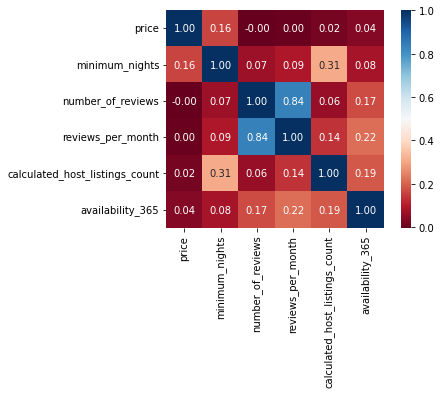

In [31]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

#### **Observações**

* Não há nenhuma correlação que se destaque (positiva ou negativa)

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [32]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       2558
Entire home/apt    2189
Shared room          91
Hotel room           39
Name: room_type, dtype: int64

In [33]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts() / df_clean.shape[0])

Private room       0.524503
Entire home/apt    0.448842
Shared room        0.018659
Hotel room         0.007997
Name: room_type, dtype: float64


In [34]:
# preço médio por cada tipo de quarto
df_clean.groupby(['room_type']).mean()['price']

room_type
Entire home/apt    125.772956
Hotel room         107.846154
Private room        62.179046
Shared room         43.362637
Name: price, dtype: float64

#### **Observações**

* Private room e Entire home/apt compreendem quase todos os imóveis do dataset (mais de 97% dos valores)

* Existem poucos shared rooms (quartos compartilhados) e seu valor médio é o menor entre os tipos de anúncios

* Hotel possui a menor quantidade de anúncios, em compensação custam quase o dobro de um quarto privado

* Entire home/apt corresponde à 52,4% dos anúncios e é o tipo de anúncio com maior preço médio

### **Q8. Qual a localidade mais cara do dataset?**



In [35]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).mean()['price']

neighbourhood
Dn Laoghaire-Rathdown    93.629063
Dublin City              93.773800
Fingal                   75.118534
South Dublin             63.822660
Name: price, dtype: float64

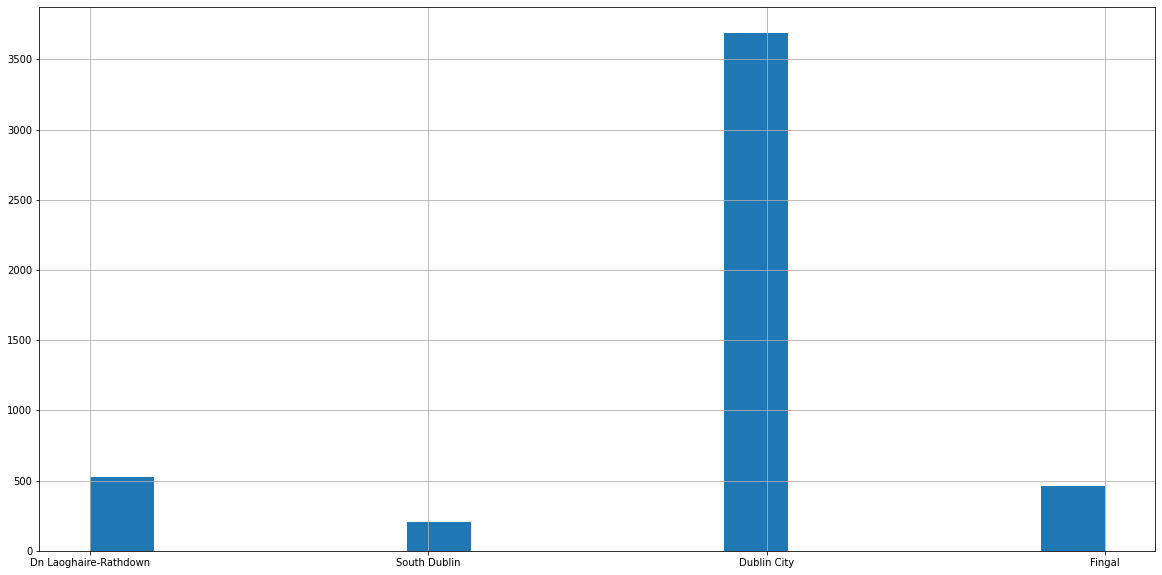

In [36]:
# distribuição dos imoveis por bairro
df_clean.neighbourhood.hist(bins=16, figsize=(20,10));

In [37]:
# percentual de anúncios por bairro
df_clean.neighbourhood.value_counts() / df_clean.shape[0]

Dublin City              0.755998
Dn Laoghaire-Rathdown    0.107238
Fingal                   0.095140
South Dublin             0.041624
Name: neighbourhood, dtype: float64

In [38]:
# preço por tipo de quarto e bairro
room_type_price = df_clean.groupby([ 'room_type', 'neighbourhood']).mean()['price']
print('Preço médio dos anúncios por localização e tipo de anúncio \n')

print(room_type_price)

Preço médio dos anúncios por localização e tipo de anúncio 

room_type        neighbourhood        
Entire home/apt  Dn Laoghaire-Rathdown    133.644000
                 Dublin City              125.143426
                 Fingal                   121.311111
                 South Dublin             120.255319
Hotel room       Dublin City              107.729730
                 Fingal                   110.000000
Private room     Dn Laoghaire-Rathdown     56.735075
                 Dublin City               65.445790
                 Fingal                    55.635514
                 South Dublin              46.546053
Shared room      Dn Laoghaire-Rathdown     70.400000
                 Dublin City               39.026316
                 Fingal                    66.500000
                 South Dublin              57.250000
Name: price, dtype: float64


In [39]:
# distribuição dos anúncios por bairros e tipo
print('Distribuição percentual dos tipos de anúncio por bairro \n')
for item in df_clean.neighbourhood.unique():
  print('Bairro ' + str(item) + '\n')
  print(df_clean.groupby(['neighbourhood', 'room_type']).count().loc[item,'price'] /df_clean.loc[df_clean['neighbourhood'] == item].shape[0]*100)
  print('\n')


#  print(df_clean.groupby(['neighbourhood', 'room_type']).count().loc['Dublin City','price'] /df_clean.loc[df_clean['neighbourhood'] == 'Dublin City'].shape[0]*100)


Distribuição percentual dos tipos de anúncio por bairro 

Bairro Dn Laoghaire-Rathdown

room_type
Entire home/apt    47.801147
Private room       51.242830
Shared room         0.956023
Name: price, dtype: float64


Bairro South Dublin

room_type
Entire home/apt    23.152709
Private room       74.876847
Shared room         1.970443
Name: price, dtype: float64


Bairro Dublin City

room_type
Entire home/apt    47.653919
Hotel room          1.003526
Private room       49.281258
Shared room         2.061296
Name: price, dtype: float64


Bairro Fingal

room_type
Entire home/apt    29.094828
Hotel room          0.431034
Private room       69.181034
Shared room         1.293103
Name: price, dtype: float64




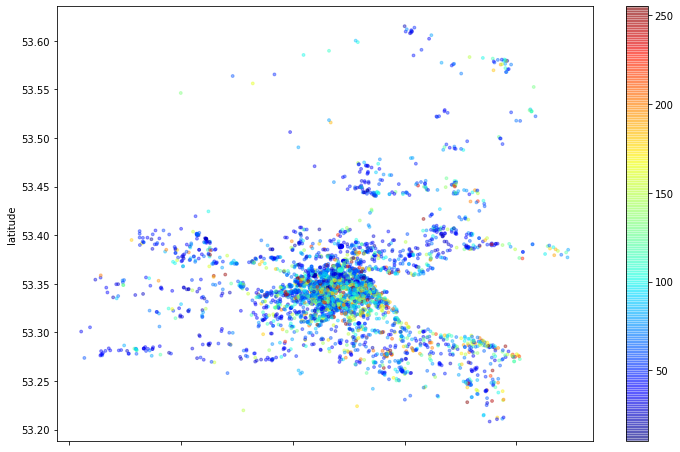

In [40]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

#### **Observações**

* Primeiro ponto que me chamou a atenção foi quantidade reduzida de bairros, apenas 4. Seguindo nesse tópico, Dublin City concentra mais de **75,5%** dos anúncios

* O bairro mais caro é o Dublin City Dn Laoghaire-Rathdown seguido por Dn Laoghaire-Rathdown. Esses dois bairros se destacam dos demais no quesito preço especialmente pela concentração de entire home/apt, que é o tipo de acomodação mais cara. Ambos passam de **47%** de acomodações desse tipo enquanto os demais bairros chegam até **29%**

* Já o bairro mais barato é South Dublin, que é o que possui menos acomodações do tipo entire home/apt (apenas **23%**) e também possui o menor preço médio para esse tipo de acomodação (120 Euros)

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [41]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

3.1152347754767273

In [42]:
# minimum_nights por bairro
df_clean.groupby(['neighbourhood']).mean()['minimum_nights']

neighbourhood
Dn Laoghaire-Rathdown    3.430210
Dublin City              3.199349
Fingal                   2.420259
South Dublin             2.364532
Name: minimum_nights, dtype: float64

## Conclusões


* Mesmo com a análise sendo executada na versão resumida dos dados foi possível extrair algumas informações e identificar dados considerados outliers

* Foi possível identificar que as acomodações do tipo **entire home/apt** são as mais caras disponíveis em Dublin

* Foi possível identificar que o **Dublin City** bairro possui o maior preço médio, porém não significa necessariamente que esse bairro seja realmente mais caro, pois vimos que ele contém mais acomodações do tipo mais cara que os demais. Esse bairro também concentra a maior parte dos anúncios (**75,5%**)

* O bairro **Dn Laoghaire-Rathdown (10% dos anúncios)** é o segundo mais caro da lista, também possui mais de 47% de anúncios do tipo entire home/apt

* O bairro **South Dublin** possui apenas **4,1%** dos anúncios e é o bairro mais barato da lista, com preço médio de **63,82 Euros**.